In [1]:
import numpy as np


In [2]:
u = 20
i = 100
k = int(i/2) # this is latent features

# this is the target which we are factorizing
V = np.random.rand(u, i) * 100

# p and q are the matrix which are to be make so that
# np.dot(W, H) == V
W = np.random.rand(u, k) * 100 
H = np.random.rand(k, i) * 100

In [3]:
# calculate error...
def mse(x, y):
    return np.mean((x - y)**2)

In [4]:
def update_step(V, W1, H1):
    """
    Performs a single update of H and then W
    returns the updated H W    
    """
    W = np.copy(W1)
    H = np.copy(H1)
    wtv = np.dot(W.T, V)
    #wtwh = W.T.dot(W).dot(V)
    for idx, _ in np.ndenumerate(H):
        x, y = idx
        wtwh = (W.T.dot(W).dot(H))
        H[x, y] = H[x, y] * (wtv[x, y])/(wtwh[x, y])
    
    vht = V.dot(H.T)
    #whht = W.dot(H).dot(H.T)
    for idx, _ in np.ndenumerate(W):
        x, y = idx
        W[x, y] = W[x, y] * (vht[x, y])/(W.dot(H).dot(H.T)[x, y])
    
    return W, H
    
    
    

In [5]:
W1, H1 = update_step(V, W, H)

In [6]:
mse_vec = []
for _ in range(1000):
    mse_vec.append(mse(V, np.dot(W, H)))
    W, H = update_step(V, W, H)

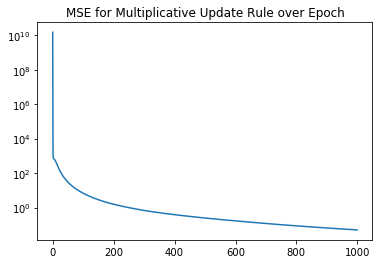

In [22]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.plot(list(range(0, 1000)), mse_vec[0:1000])
plt.title('MSE for Multiplicative Update Rule over Epoch')
plt.yscale("log")
plt.show()